# NYC Daily Subway Data: Impact of Coronavirus on Mobility

_How has NYC subway service been impacted by coronavirus so far?_
_Are people respecting the lockdown?_

This notebook tries to asnwer this questions.

#### Libraries and built-in functions

In [2]:
import os
import numpy as np
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd

def calmap(ax, year, data, origin="upper", weekstart="sun"):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []

    start = datetime(year, 1, 1).weekday()

    _data = np.zeros(7 * 53) * np.nan
    _data[start:start + len(data)] = data
    data = _data.reshape(53, 7).T

    for month in range(1, 13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        if origin == "lower":
            y0 = first.weekday()
            y1 = last.weekday()
            x0 = (int(first.strftime("%j")) + start - 1) // 7
            x1 = (int(last.strftime("%j")) + start - 1) // 7
            P = [(x0, y0), (x0, 7), (x1, 7), (x1, y1 + 1),
                 (x1 + 1, y1 + 1), (x1 + 1, 0), (x0 + 1, 0), (x0 + 1, y0)]
        else:
            y0 = 6 - first.weekday()
            y1 = 6 - last.weekday()
            x0 = (int(first.strftime("%j")) + start - 1) // 7
            x1 = (int(last.strftime("%j")) + start - 1) // 7
            P = [(x0, y0 + 1), (x0, 0), (x1, 0), (x1, y1),
                 (x1 + 1, y1), (x1 + 1, 7), (x0 + 1, 7), (x0 + 1, y0 + 1)]

        xticks.append(x0 + (x1 - x0 + 1) / 2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)

    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))

    labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    if origin == "upper": labels = labels[::-1]
    ax.set_yticklabels(labels)
    ax.set_title("{}".format(year), size="medium", weight="bold")

    # Showing data
    cmap = plt.cm.get_cmap('coolwarm_r')
    ax.imshow(data, extent=[0, 53, 0, 7], zorder=10,
              vmin=-1, vmax=1, cmap=cmap, origin=origin)

#### Loading dataframe and fixing dates

In [5]:
rdates = pd.date_range(start = '01/01/2016', end = '12/31/2020', freq = 'd')
total = pd.read_excel(r'mta_info_daily_total_pctchange.xlsx')\
          .drop('Unnamed: 0', axis = 1)\
          .filter(['variable', 'chg_yoy'])\
          .dropna()\
          .merge(pd.DataFrame({'variable':rdates}), on = 'variable', how = 'outer')\
          .sort_values('variable')

#### Creating calendar heatmap and saving it

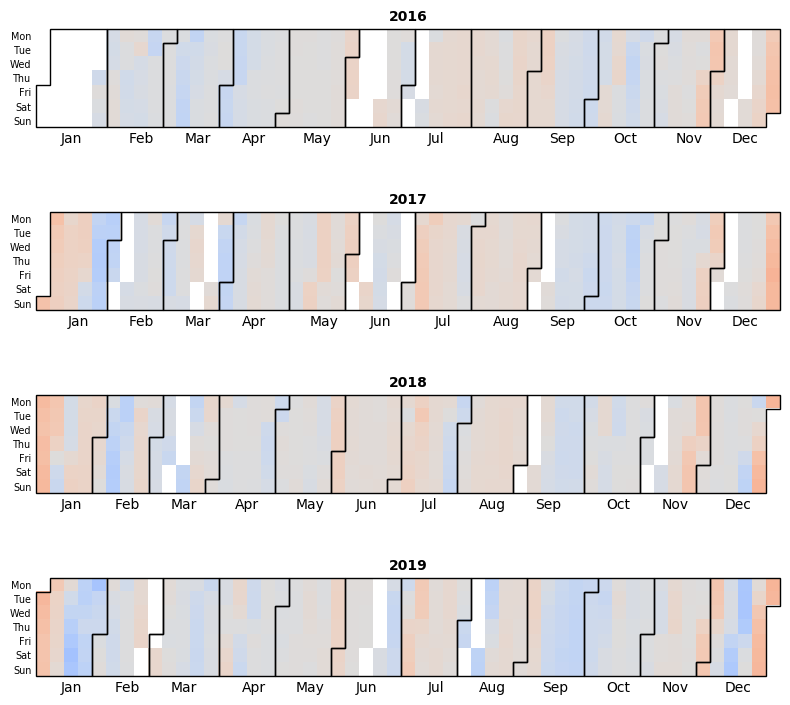

In [10]:
fig = plt.figure(figsize=(8, 7.5), dpi=100)
year = 2016
n = 4
for i in range(n):
    ax = plt.subplot(n, 1, i + 1, xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
    calmap(ax, year + i, (total.query(f'variable.dt.year == {year + i}').chg_yoy.values), origin="upper")

plt.tight_layout()
plt.savefig(r"nyc_calendar_heatmap.png", dpi=300)
plt.show()

It's clear from de graph that coronavirus has decreased the
 number of passengers in a level never seen before.